In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar,newton,bisect,fixed_point


# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

La anomalía excéntrica del cometa Halley el 9 de abril de 1986 fue de 0.25994879192171233


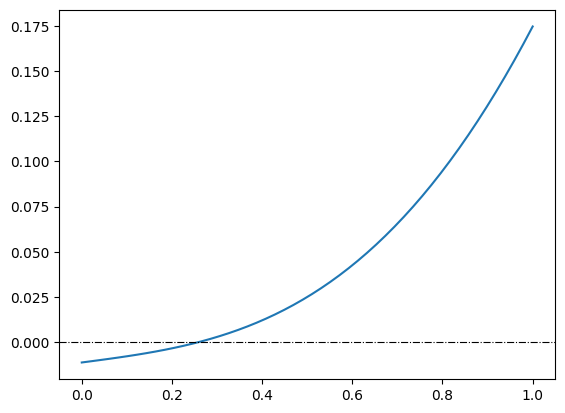

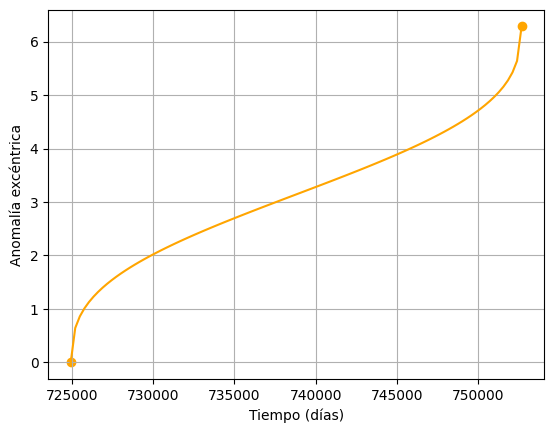

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

e=0.9672671
T=75.96000*365 #El periodo en días, para que estén en las mismas unidades
t0=1986*365+40
tabril=1986*365+90

E=np.linspace(0,1)

M=lambda t: ((2*np.pi)/T)*(t-t0)
f=lambda E:E-e*np.sin(E)-M(tabril)


plt.plot(E,f(E))
plt.axhline(0, color="black", linestyle="-.", linewidth=0.8)
print(f"La anomalía excéntrica del cometa Halley el 9 de abril de 1986 fue de {newton(f,0)}")
plt.show()

periodo=np.linspace(t0,t0+T,100)
AE=[]
for i in periodo:
  eme=M(float(i))  #El ciclo encuentra el 0 asociado a determinado t dentro del periodon y lo almacena en la lista AE
  f=lambda E:E-e*np.sin(E)-eme
  AE.append(newton(f,0))
plt.plot(periodo,AE, color="orange")
plt.grid()
plt.scatter(t0,AE[0], color="orange")
plt.scatter(t0+T,AE[-1], color="orange")
plt.xlabel("Tiempo (días)")
plt.ylabel("Anomalía excéntrica")
plt.show()

 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


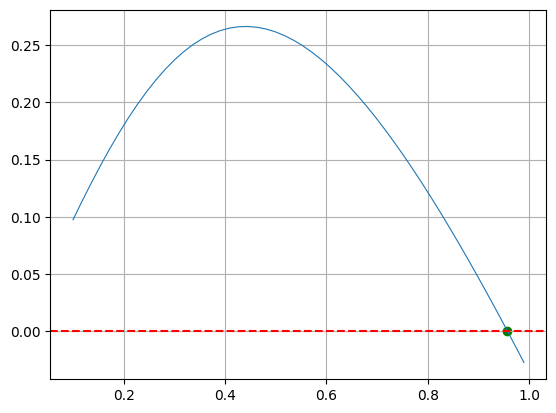

Con el método de Newton-Raphson M(0.5)≈0.9575, con el método de la bisección M(0.5)≈0.9575, con punto fijo M(0.5)≈0.9575


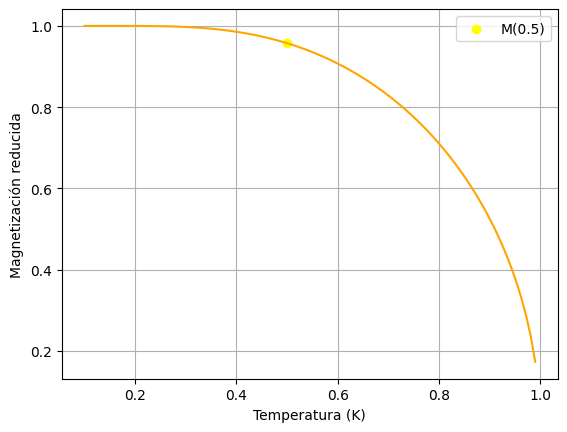

In [ ]:
zero=lambda m: np.tanh(m/0.5)-m
T=0.5
m=np.linspace(0.1,0.99)
plt.plot(m,zero(m), linewidth=0.8)
plt.axhline(0, color="r", linestyle="--")

plt.scatter(newton(zero,x0=0.5),zero(bisect(zero,0.1,1)), color="green")
plt.grid()
plt.show()

g=lambda x:np.tanh(x/0.5)

print(f"Con el método de Newton-Raphson M(0.5)≈{round(newton(zero,x0=0.5),4)}, con el método de la bisección M(0.5)≈{round(bisect(zero,0.1,1),4)}, con punto fijo M(0.5)≈{round(float(fixed_point(g,0.6)),4)}") #Acá están los valores para cada unop de los métodos

T=np.linspace(0.1,0.99,100)
M=np.zeros(100)
for i in range(0,len(T)):
  zero=lambda m: np.tanh(m/T[i])-m
  M[i]=float(root_scalar(zero,x0=1,method="secant")["root"]) #Toca hacer esas maromas para que muestre el float y no la tabla de resultados
plt.plot(T,M, color="orange")
plt.xlabel("Temperatura (K)")
plt.ylabel("Magnetización reducida")
plt.scatter(0.5,float(fixed_point(g,0.6)),label="M(0.5)", color="yellow")
plt.legend()
plt.grid()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  

T = 904.9743413388667,  G(T) = -100000.00000000003


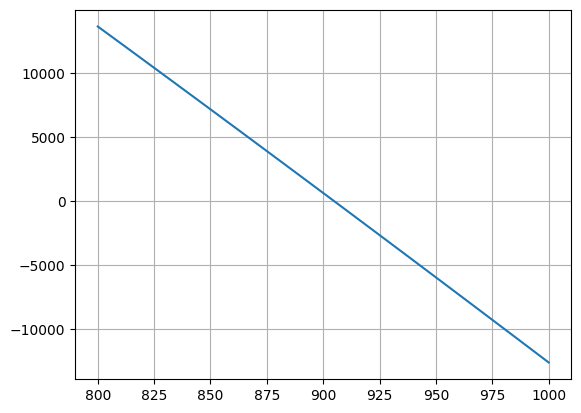

In [230]:
R=8.314
T0=4.444
G=lambda T: -R*T*np.log((T/T0)**(5/2))
zero=lambda T:G(T)+1e5 #Igualo a 100000 y despejo para que quede igualado a 0 y usar los métodos que tengo

T=np.linspace(800,1000)
plt.plot(T,zero(T))  #Hice la gráfica para saber dónde poner x0
plt.grid()
print(f"T = {float(newton(zero,900))},  G(T) = {G(float(newton(zero,900)))}")


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

<ipython-input-174-a7425e2aedce>:6: RuntimeWarning: invalid value encountered in scalar divide
  return(2*np.sin(x)*(np.cos(x)-np.sin(x)/x))/(x**2)


La lista de los máximos locales de la función I es [0.01648002599297382, 0.04719044922581127, 1.0, 0.04719044922581127, 0.01648002599297386]
La lista de los mínimos locales de la función I es [1.0684879041090155e-17, 2.0575057912861913e-16, 2.1411084032457386e-17, 1.735368172907781e-16, 3.0915162214006424e-18, 2.297415073588656e-16]


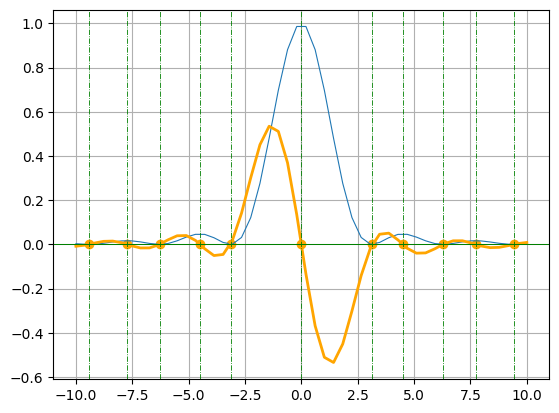

In [174]:
def I(x):
  return ((np.sin(x)/x)**2) #I0 = 1
x=np.linspace(-10,10)

def dI(x):
  return(2*np.sin(x)*(np.cos(x)-np.sin(x)/x))/(x**2)

plt.plot(x,I(x),linewidth=0.8,)
plt.plot(x,dI(x), linewidth=2, color="orange")


def regula(f,a,b, tol=1e-8,maxiter=100):
  for i in range(maxiter):
    c=b-(f(b)*(b-a))/(f(b)-f(a))  #Es muy parecida a la bisección, solo que c tiene esa fórmula en lugar del punto medio
    if abs(f(c))<tol:
      return c
    elif f(a)*f(c)<0:
      b=c
    elif f(b)*f(c)<0:
      a=c

zeros=[]
mm=[]
max=[]
min=[]
n=0
j=-9.5 #van a variar de 0.5 en 0.5 hasta encontrar los ceros en el intervalo [-10,10]
i=-10

while True:
  if dI(i)*dI(j)<0:  #Gracias a este condicional solo evalúa los intervalos en que f(a) y f(b) tienen signos distintos
    zeros.append(float(regula(dI,i,j)))  #Va añadiendo los ceros a una lista
    i=j
    j=i+0.5  #cuando ya encontró un cero hace este salto para que no se repitan
  else:
    j+=0.5  #la j cambia para hacer un intervalo más grande hasta que se cumpla la desigualdad
  if j>10:
    break


for k in zeros:
  plt.axvline(k, color="green", linewidth="0.6", linestyle="-.")  #Acá gice una gráfica muestre los ceros junto con las funciones
  plt.scatter(k,dI(k),color="orange")
  plt.axhline(0, color="g", linewidth=0.6)
  plt.grid()
  mm.append(float(I(k)))



for i in mm:
  if round(i,4)==0:
    min.append(i)
  else:
    max.append(i)
print(f"La lista de los máximos locales de la función I es {max}")
print(f"La lista de los mínimos locales de la función I es {min}")

#medio=lambda x :(I(x))-1/2
#root_scalar(medio,method="secant",x0=np.pi)


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

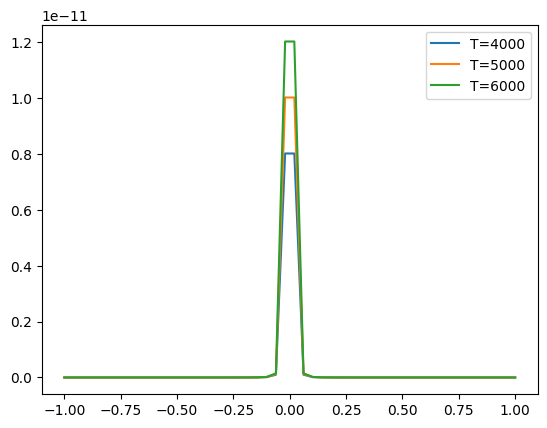

El lambda que corresponde al punto máximo de la función u es  5.014e-07, la ley de desplazamiento de Wien se confirma, pues lambda*T =  2.897e-03 


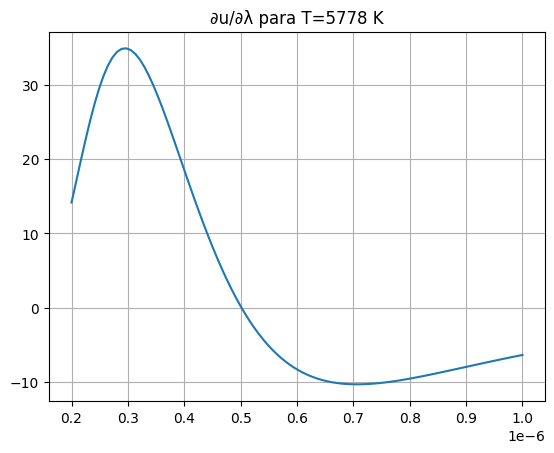

In [157]:
kb=1.381e-23
h=6.626e-34
c=2.998e8

l0=lambda T: (h*c)/(kb*T)

K=lambda T:(8*np.pi*kb*T)/(l0(T)**4)

def u(l,T):
  return (8*np.pi*h*c)/((l**5)*(np.exp((h*c)/(l*kb*T))-1)) #Escribí lambda_0 y K en función de T para usarlas en las otras funciones


def usim(l,T):
  x=l/l0(T)
  return K(T)/((x**5)*(np.exp(1/x)-1))

def du(l,T=5778):
  x=l/l0(T)
  num=(K(T)*l0(T))*(5*x + (np.exp(1/x))*(1-5*x))
  den=x**7*((np.exp(1/x)-1)**2)
  return num/den

l=np.linspace(-1, 1,)
dl=np.linspace(2e-7, 1e-6, 100)

plt.plot(l, u(l,4000), label="T=4000")
plt.plot(l, u(l,5000), label="T=5000")
plt.plot(l, u(l,6000), label="T=6000")
#plt.plot(l,du(l))
plt.legend()
plt.show()

plt.plot(dl,du(dl))
plt.grid()
plt.title("∂u/∂λ para T=5778 K")



zerobisect=float(bisect(du,0.4e-6,0.6e-6)) #Solo lo hice con bisección porque Newton no estaba funcionando bien
wien=zerobisect*5778
print(f"El lambda que corresponde al punto máximo de la función u es {zerobisect: .3e}, la ley de desplazamiento de Wien se confirma, pues lambda*T = {wien: .3e} ")

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

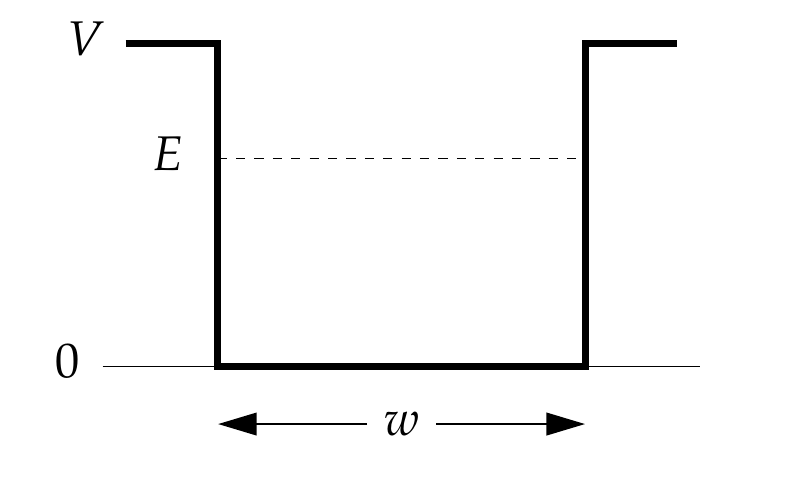

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

<ipython-input-229-341b992e0fcf>:7: RuntimeWarning: divide by zero encountered in divide
  y2=lambda E: ((V-E)/E)**(1/2)
<ipython-input-229-341b992e0fcf>:8: RuntimeWarning: divide by zero encountered in divide
  y3=lambda E: -(E/(V-E))**(1/2)


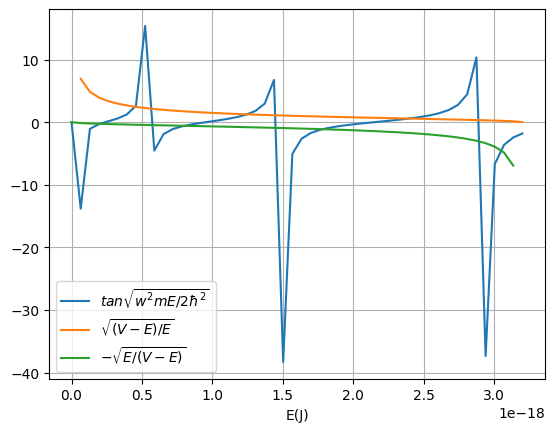

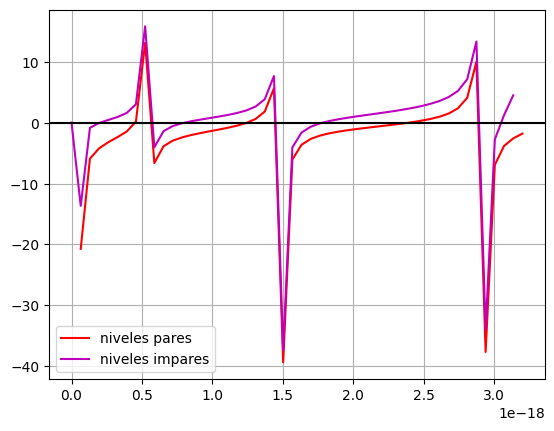

La energía asociada al nivel 1 es  2.02e-19
La energía asociada al nivel 2 es  4.53e-19
La energía asociada al nivel 3 es  8.03e-19
La energía asociada al nivel 4 es  1.25e-18
La energía asociada al nivel 5 es  1.78e-18
La energía asociada al nivel 6 es  2.40e-18


In [229]:
m=9.11e-31
V=20*(1.601e-19)  #cambié todos los valores a mks
w=1e-9
h=1.05e-34


prec= 0.001*1.601e-19 #la precisión en mks
y1=lambda E: np.tan((((w**2)*m*E)/(2*(h**2)))**(1/2))
y2=lambda E: ((V-E)/E)**(1/2)
y3=lambda E: -(E/(V-E))**(1/2)

E=np.linspace(0,20*(1.601e-19))

plt.plot(E,y1(E), label="$ tan \sqrt{w^2 m E / 2 \hbar^2}$")
plt.plot(E,y2(E),label="$ \sqrt{(V-E)/E}$ ")
plt.plot(E,y3(E),label="$- \sqrt{E/(V-E)}$ ")
plt.grid()
plt.legend()
plt.xlabel("E(J)")
plt.show()

ceropar= lambda E: y1(E)-y2(E)
ceroimpar= lambda E: y1(E)-y3(E)

plt.plot(E,ceropar(E), color="r", label="niveles pares")
plt.plot(E,ceroimpar(E),color="m", label="niveles impares") #Hice esta gráfica para poder ver en qué puntos la función que determina el 0 tiene signos distintos
plt.grid()
plt.axhline(0, color="black")
plt.legend()
plt.show()

nivel1=bisect(ceroimpar,0.1e-18,0.4e-18,xtol=prec)
nivel2=bisect(ceropar,0.3e-18,0.5e-18,xtol=prec)  #prec es la precisión que pedían inicialmente, pero en Julios
nivel3=bisect(ceroimpar,0.6e-18,1.3e-18,xtol=prec)
nivel4=bisect(ceropar,1e-18,1.3e-18,xtol=prec)
nivel5=bisect(ceroimpar,1.53e-18,2e-18,xtol=prec)
nivel6=bisect(ceropar,2.2e-18,2.6e-18,xtol=prec)

niveles=[nivel1,nivel2,nivel3,nivel4,nivel5,nivel6]

for i in range(1, 7):
  print(f"La energía asociada al nivel {i} es {niveles[i-1]: .2e}")

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

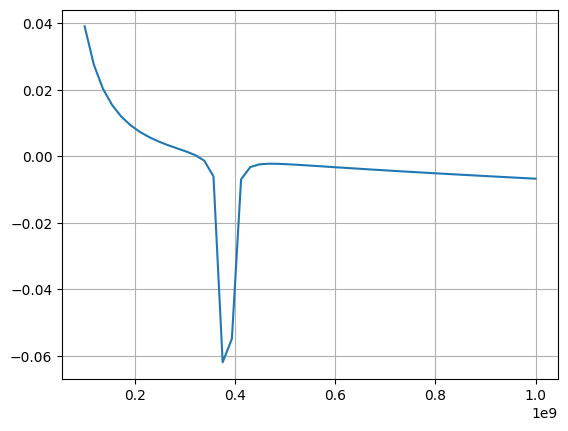

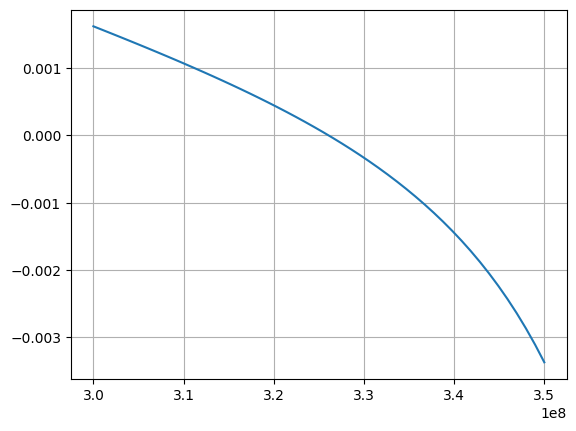

Con el método de Newton L_1 = 326045071.66535544
Con el método de la secante L_1 = 326045071.66535544


In [ ]:
G=6.674e-11
M=5.974e24
m=7.348e22
R=3.844e8
w=2.662e-6

f=lambda r: (G*M)/(r**2)-(G*m)/((R-r)**2)-(w**2)*r
#Para saber qué valor inicial y qué puntos a y b escoger, voy a graficar la función

r=np.linspace(1e8,1e9) #Con el objetivo de "facilitarle" a las funciones encontrar el 0, voy a acercar lo más posible x0 para newton y la secante
plt.plot(r,f(r))
plt.grid()
plt.show()

r=np.linspace(0.3e9,0.35e9) #intenté varios intervalos de r y en este se ve bastante bien la ubicación del 0
plt.plot(r,f(r))
plt.grid()
plt.show()

sec=float(root_scalar(f,method="secant",x0=3.2e8)["root"]) #Por alguna razón no me dejaba meter la expresión en el print entonces acá lo puse como variable
print(f"Con el método de Newton L_1 = {newton(f,3.2e8)}")
print(f"Con el método de la secante L_1 = {sec}")